# Lecture 5. Analytical Solutions of Differential Equations

Things to include:
- more examples of diff equation solution like Michaelis-Menten, allele propagation
- examples of numerical evaluations that produce errors

**The goal of this jupyter notebook is to introduce you to analytical methods of solving differential equations using SymPy dsolve() and introduce SymPy library in general**

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Introduction to SymPy

SymPy is a python library for symbolic math calculations.  
We will be mostly concerned with using SymPy to analytically solve differential equations but SymPy has many other capabilities that we'll briefly review in the beginning.



Why should we care about doing symbolic math on a computer when numerical calculations are so easy?  
There're at least two agruments in support of symbolic math calculations:  
- Equations can be dramatically simplified using symbolic math so that it's easier to do numerical calculations 
- Numerical calculations have errors introduced by approximation of numerical methods and by inability of computers to represent rational numbers precisely  


### Representation of numbers by a computer

Computers represent number as certain number of bits.  
Python supports various types of number like  
For example, Int64  
Read more info about representation of numbers by a computer at these links:  


### Solving algebraic equations with SymPy solveset()

solveset() can be used to analytically solve a large variety of algebraic equations and systems of equations

### Simplifying equation with SymPy simplify()

simplify() and related function can be used to simplify various equations, which SymPy doesn't do by default.  
It is often useful to define if a particular variable or function is expected to be a real number, positive number, integer etc to allow more appropriate simplifications

In [74]:
sym.cos(1) ** 2 + sym.sin(1) ** 2

cos(1)**2 + sin(1)**2

In [75]:
sym.simplify(sym.cos(1) ** 2 + sym.sin(1) ** 2)

1

### SymPy equations can be numerically evaluated using subs() and evalf()

In [83]:
x, y, z = sym.symbols("x, y, z")
expr = x ** 2 + y ** 2
expr

x**2 + y**2

subs() can be used to substitute variable with numbers or with other variables

In [84]:
expr.subs({x: sym.pi, y: z ** 2})

z**4 + pi**2

In [76]:
expr.subs({x: sym.pi, y: 1})

1 + pi**2

evalf() can be used to numerically evaluate the equation with desired numerical precision

In [82]:
expr.subs({x: sym.pi, y: 1}).evalf(100)

10.86960440108935861883449099987615113531369940724079062641334937622004482241920524300177340371855223

## Analytically solving ODEs with SymPy dsolve()

Lets use our favorite bacterial growth rate in rich media as an example:
  
### $\frac{dN(t)}{dt}=kN(t)$  

where $t$ is time, k is some constant specific for this E.coli strain and growth conditions, $N(t)$ is number of E. coli at time $t$.  

In [25]:
N = sym.symbols("N", cls=sym.Function)
t, k, N0 = sym.symbols("t, k, N0")
solution = sym.dsolve(sym.diff(N(t), t) - k * N(t), N(t), ics={N(0): N0})
solution

Eq(N(t), N0*exp(k*t))

We can plot the solution using SymPy built-in plotting function.  
SymPy built-in plot function doesn't require us to make an array of $t$ like matplotlib so might be more convenient.

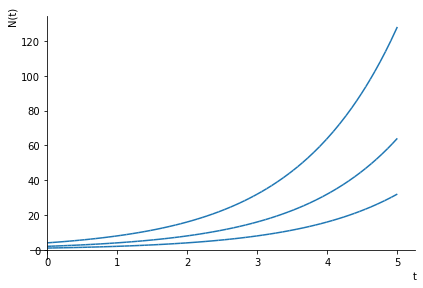

In [88]:
sym.plot(
    solution.rhs.subs({N0: 1, k: sym.ln(2)}),
    solution.rhs.subs({N0: 2, k: sym.ln(2)}),
    solution.rhs.subs({N0: 4, k: sym.ln(2)}),
    (t, 0, 5),
    xlabel="t",
    ylabel="N(t)",
);